## VGG

In [1]:
%matplotlib inline
import torch
from torch import nn
import numpy as np
import matplotlib.pylab as plt
import d2lzh_pytorch as d2l
import mypytorch

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def vgg_block(num_convs, in_channels, out_channels):
    blk = []
    for i in range(num_convs):
        if i == 0:
            blk.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        else:
            blk.append(nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1))
        blk.append(nn.ReLU())
    blk.append(nn.MaxPool2d(kernel_size=2, stride=2)) # 这里会使宽高减半
    return nn.Sequential(*blk)

In [3]:
net = vgg_block(3, 1, 255)
print(net)

Sequential(
  (0): Conv2d(1, 255, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(255, 255, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): Conv2d(255, 255, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [4]:
conv_arch = ((1, 1, 64), (1, 64, 128), (2, 128, 256), (2, 256, 512), (2, 512, 512))
# 经过5个vgg_block, 宽高会减半5次, 变成 224/32 = 7
fc_features = 512 * 7 * 7 # c * w * h
fc_hidden_units = 4096 # 任意

In [5]:
def vgg(conv_arch, fc_features, fc_hidden_units=4096):
    net = nn.Sequential()
    # 卷积层部分
    for i, (num_convs, in_channels, out_channels) in enumerate(conv_arch):
        # 每经过一个vgg_block都会使宽高减半
        net.add_module("vgg_block_" + str(i+1), vgg_block(num_convs, in_channels, out_channels))
    # 全连接层部分
    net.add_module("fc", nn.Sequential(d2l.FlattenLayer(),
                                 nn.Linear(fc_features, fc_hidden_units),
                                 nn.ReLU(),
                                 nn.Dropout(0.5),
                                 nn.Linear(fc_hidden_units, fc_hidden_units),
                                 nn.ReLU(),
                                 nn.Dropout(0.5),
                                 nn.Linear(fc_hidden_units, 10)
                                ))
    return net

In [6]:
net = vgg(conv_arch, fc_features, fc_hidden_units)
print(net)

Sequential(
  (vgg_block_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0,

In [7]:
X = torch.randn((255, 1, 224, 224), dtype=torch.float)
for name, blk in net.named_children():
    X = blk(X)
    print(name, 'output shape: ', X.shape)

vgg_block_1 output shape:  torch.Size([255, 64, 112, 112])
vgg_block_2 output shape:  torch.Size([255, 128, 56, 56])
vgg_block_3 output shape:  torch.Size([255, 256, 28, 28])
vgg_block_4 output shape:  torch.Size([255, 512, 14, 14])
vgg_block_5 output shape:  torch.Size([255, 512, 7, 7])
fc output shape:  torch.Size([255, 10])


In [8]:
conv_arch = ((1, 1, 2), (1, 2, 4), (2, 4, 8), (2, 8, 16), (2, 16, 32))
# 经过5个vgg_block, 宽高会减半5次, 变成 224/32 = 7
fc_features = 32 * 7 * 7 # c * w * h
fc_hidden_units = 512 # 任意

In [9]:
net = vgg(conv_arch, fc_features, fc_hidden_units)
print(net)

Sequential(
  (vgg_block_1): Sequential(
    (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_2): Sequential(
    (0): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_3): Sequential(
    (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_4): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil

In [10]:
batch_size = 128
# 如出现“out of memory”的报错信息，可减小batch_size或resize
train_iter, test_iter = mypytorch.load_data_fashion_mnist(batch_size, resize=224)

训练样本集容量: 60000 测试样本集容量: 10000


In [11]:
X = torch.randn((255, 1, 224, 224), dtype=torch.float)
for name, blk in net.named_children():
    X = blk(X)
    print(name, 'output shape: ', X.shape)

vgg_block_1 output shape:  torch.Size([255, 2, 112, 112])
vgg_block_2 output shape:  torch.Size([255, 4, 56, 56])
vgg_block_3 output shape:  torch.Size([255, 8, 28, 28])
vgg_block_4 output shape:  torch.Size([255, 16, 14, 14])
vgg_block_5 output shape:  torch.Size([255, 32, 7, 7])
fc output shape:  torch.Size([255, 10])


In [12]:
lr, num_epochs = 0.001, 5
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
l_list = mypytorch.train_ch5(net, train_iter, test_iter, batch_size, optimizer, device, num_epochs)

training on cpu


KeyboardInterrupt: 

-- --

## NiN

In [13]:
%matplotlib inline
import torch
from torch import nn
import numpy as np
import matplotlib.pylab as plt
import d2lzh_pytorch as d2l
import mypytorch

In [14]:
def nin_block(in_channels, out_channels, kernel_size, stride, padding):
    blk = nn.Sequential(nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding),
                        nn.ReLU(),
                        nn.Conv2d(out_channels, out_channels, kernel_size=1),
                        nn.ReLU(),
                        nn.Conv2d(out_channels, out_channels, kernel_size=1),
                        nn.ReLU())
    return blk

In [15]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, stride=4, padding=0),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nin_block(96, 256, kernel_size=5, stride=1, padding=2),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nin_block(256, 384, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Dropout(0.5),
    # 标签类别数是10
    nin_block(384, 10, kernel_size=3, stride=1, padding=1),
    mypytorch.GlobalAvgPool2d(),
    # 将四维的输出转成二维的输出，其形状为(批量大小, 10)
    d2l.FlattenLayer()
)
print(net)

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU()
  )
  (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU()
  )
  (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(384, 384, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(384, 384, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU()
  )
  (5): MaxPool2d(kernel_size=3, stri

In [16]:
X = torch.rand(1, 1, 224, 224)
for name, blk in net.named_children():
    X = blk(X)
    print(name, 'output shape: ', X.shape)

0 output shape:  torch.Size([1, 96, 54, 54])
1 output shape:  torch.Size([1, 96, 26, 26])
2 output shape:  torch.Size([1, 256, 26, 26])
3 output shape:  torch.Size([1, 256, 12, 12])
4 output shape:  torch.Size([1, 384, 12, 12])
5 output shape:  torch.Size([1, 384, 5, 5])
6 output shape:  torch.Size([1, 384, 5, 5])
7 output shape:  torch.Size([1, 10, 5, 5])
8 output shape:  torch.Size([1, 10, 1, 1])
9 output shape:  torch.Size([1, 10])


In [17]:
X = torch.tensor([[[[1, 2], [3, 4]], [[2, 3], [4, 5]]], [[[3, 4], [5, 6]], [[4, 5], [6, 7]]]], dtype=torch.float)
print(X)
mean = X.mean(dim=0, keepdim=True)
print(mean)
mean = X.mean(dim=0, keepdim=True).mean(dim=2, keepdim=True)
print(mean)
mean = X.mean(dim=0, keepdim=True).mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
print(mean)

tensor([[[[1., 2.],
          [3., 4.]],

         [[2., 3.],
          [4., 5.]]],


        [[[3., 4.],
          [5., 6.]],

         [[4., 5.],
          [6., 7.]]]])
tensor([[[[2., 3.],
          [4., 5.]],

         [[3., 4.],
          [5., 6.]]]])
tensor([[[[3., 4.]],

         [[4., 5.]]]])
tensor([[[[3.5000]],

         [[4.5000]]]])


## BN批量归一化

In [18]:
def batch_norm(is_training, X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # 判断当前模式是训练模式还是预测模式
    if not is_training:
        # 如果是在预测模式下，直接使用传入的移动平均所得的均值和方差
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # 使用全连接层的情况，计算特征维上的均值和方差
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # 使用二维卷积层的情况，计算通道维上（axis=1）的均值和方差。这里我们需要保持
            # X的形状以便后面可以做广播运算
            mean = X.mean(dim=0, keepdim=True).mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # 训练模式下用当前的均值和方差做标准化
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # 更新移动平均的均值和方差
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
        moving_var = momentum * moving_var + (1.0 - momentum) * var
    Y = gamma * X_hat + beta  # 拉伸和偏移
    return Y, moving_mean, moving_var

In [19]:
class BatchNorm(nn.Module):
    def __init__(self, num_features, num_dims):
        super(BatchNorm, self).__init__()
        # 首先要知道是全连接层还是卷积层
        if num_dims == 2:
            shape = (1, num_features)
        elif num_dims == 4:
            shape = (1, num_features, 1, 1)

        # 参与求梯度和迭代的拉伸和偏移参数，分别初始化成0和1
        self.gamma = nn.Parameter(torch.ones(shape))  # 使用nn.Parameter会自动加入该层的参数中，参与求梯度
        self.beta = nn.Parameter(torch.zeros(shape))  # 这里用到的是广播机制
        # 不参与求梯度和迭代的变量，全在内存上初始化成0
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.zeros(shape)

    def forward(self, X):
        # 如果X不在内存上，将moving_mean和moving_var复制到X所在显存上
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # 保存更新过的moving_mean和moving_var, Module实例的traning属性默认为true, 调用.eval()后设成false
        Y, self.moving_mean, self.moving_var = batch_norm(self.training,
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.9)
        return Y


In [20]:
net = BatchNorm(100, 4)
for name, parameter in net.named_parameters():
    print(name, parameter.shape)

gamma torch.Size([1, 100, 1, 1])
beta torch.Size([1, 100, 1, 1])


In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = nn.Sequential(
            nn.Conv2d(1, 6, 5), # in_channels, out_channels, kernel_size
            BatchNorm(6, num_dims=4),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2), # kernel_size, stride
            nn.Conv2d(6, 16, 5),
            BatchNorm(16, num_dims=4),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2),
            d2l.FlattenLayer(),
            nn.Linear(16*4*4, 120),
            BatchNorm(120, num_dims=2),
            nn.Sigmoid(),
            nn.Linear(120, 84),
            BatchNorm(84, num_dims=2),
            nn.Sigmoid(),
            nn.Linear(84, 10)
        )

In [22]:
batch_size = 256
train_iter, test_iter = mypytorch.load_data_fashion_mnist(batch_size=batch_size)

lr, num_epochs = 0.001, 5
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
mypytorch.train_ch5(net, train_iter, test_iter, batch_size, optimizer, device, num_epochs)

训练样本集容量: 60000 测试样本集容量: 10000
training on cpu


KeyboardInterrupt: 

In [23]:
net[1].gamma.view((-1,)), net[1].beta.view((-1,))

(tensor([1.0481, 1.0286, 0.9637, 0.9313, 0.9937, 1.0273],
        grad_fn=<ViewBackward0>),
 tensor([ 0.1078, -0.1014, -0.0463, -0.0195,  0.0102,  0.0519],
        grad_fn=<ViewBackward0>))

In [24]:
net = nn.Sequential(
            nn.Conv2d(1, 6, 5), # in_channels, out_channels, kernel_size
            nn.BatchNorm2d(6),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2), # kernel_size, stride
            nn.Conv2d(6, 16, 5),
            nn.BatchNorm2d(16),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2),
            d2l.FlattenLayer(),
            nn.Linear(16*4*4, 120),
            nn.BatchNorm1d(120),
            nn.Sigmoid(),
            nn.Linear(120, 84),
            nn.BatchNorm1d(84),
            nn.Sigmoid(),
            nn.Linear(84, 10)
        )
print(net)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Sigmoid()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Sigmoid()
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): FlattenLayer()
  (9): Linear(in_features=256, out_features=120, bias=True)
  (10): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Sigmoid()
  (12): Linear(in_features=120, out_features=84, bias=True)
  (13): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): Sigmoid()
  (15): Linear(in_features=84, out_features=10, bias=True)
)


In [25]:
batch_size = 256
train_iter, test_iter = mypytorch.load_data_fashion_mnist(batch_size=batch_size)

lr, num_epochs = 0.001, 5
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
mypytorch.train_ch5(net, train_iter, test_iter, batch_size, optimizer, device, num_epochs)

训练样本集容量: 60000 测试样本集容量: 10000
training on cpu


KeyboardInterrupt: 

-- --

## 残差网络 ResNet

In [26]:
%matplotlib inline
import torch
from torch import nn
import numpy as np
import matplotlib.pylab as plt
import d2lzh_pytorch as d2l
import mypytorch

In [27]:
X = torch.randn((4, 3, 6, 6), dtype=torch.float)
blk = mypytorch.Residual(3, 3)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [28]:
blk = mypytorch.Residual(3, 6, use_1x1conv=True, stride=3)
blk(X).shape

torch.Size([4, 6, 2, 2])

In [29]:
net = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

In [30]:
def renet_block(in_channels, out_channels, num_residuals, first_block=False):
    if first_block:
        assert in_channels == out_channels
    blks = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blks.append(mypytorch.Residual(in_channels, out_channels, use_1x1conv=True, stride=2))
        else:
            blks.append(mypytorch.Residual(out_channels, out_channels))
    return nn.Sequential(*blks)

In [31]:
net.add_module('resnet_block1', renet_block(64, 64, 2, first_block=True))
net.add_module('resnet_block2', renet_block(64, 128, 2))
net.add_module('resnet_block3', renet_block(128, 256, 2))
net.add_module('resnet_block4', renet_block(256, 512, 2))
net.add_module('global_avg_pool', mypytorch.GlobalAvgPool2d())
net.add_module('fc', nn.Sequential(mypytorch.FlattenLayer(), nn.Linear(512, 10)))
print(net)

Sequential(
  (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (resnet_block1): Sequential(
    (0): Residual(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Residual(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, a

In [32]:
X = torch.randn((1, 1, 224, 224))
for name, blk in net.named_children():
    X = blk(X)
    print(name, X.shape)

0 torch.Size([1, 64, 112, 112])
1 torch.Size([1, 64, 112, 112])
2 torch.Size([1, 64, 112, 112])
3 torch.Size([1, 64, 56, 56])
resnet_block1 torch.Size([1, 64, 56, 56])
resnet_block2 torch.Size([1, 128, 28, 28])
resnet_block3 torch.Size([1, 256, 14, 14])
resnet_block4 torch.Size([1, 512, 7, 7])
global_avg_pool torch.Size([1, 512, 1, 1])
fc torch.Size([1, 10])


In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 256
# 如出现“out of memory”的报错信息，可减小batch_size或resize
train_iter, test_iter = mypytorch.load_data_fashion_mnist(batch_size, resize=96)

lr, num_epochs = 0.001, 5
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
mypytorch.train_ch5(net, train_iter, test_iter, batch_size, optimizer, device, num_epochs)

训练样本集容量: 60000 测试样本集容量: 10000
training on cpu


KeyboardInterrupt: 

-- --
# 循环神经网络

In [34]:
import torch

X, W_xh = torch.randn(3, 1), torch.randn(1, 4)
H, W_hh = torch.randn(3, 4), torch.randn(4, 4)
torch.matmul(X, W_xh) + torch.matmul(H, W_hh)

tensor([[-0.7725,  3.0355, -1.4164,  0.4598],
        [ 0.2035,  0.0279,  4.1969,  0.3503],
        [ 2.0789, -1.9873, -1.7043, -0.5002]])

In [35]:
torch.matmul(torch.cat((X, H), dim=1), torch.cat((W_xh, W_hh), dim=0))

tensor([[-0.7725,  3.0355, -1.4164,  0.4598],
        [ 0.2035,  0.0279,  4.1969,  0.3503],
        [ 2.0789, -1.9873, -1.7043, -0.5002]])

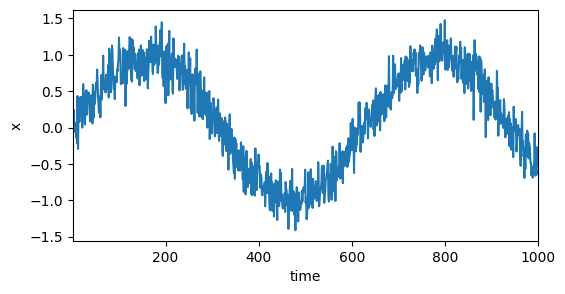

In [36]:
import mypytorch
T = 1000  # 总共产生1000个点
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
mypytorch.plot(time, x, 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [37]:
import torch
import random
import zipfile

with zipfile.ZipFile('data/jaychou_lyrics.txt.zip') as zin:
    with zin.open('jaychou_lyrics.txt') as f:
        corpus_chars = f.read().decode('utf-8')
corpus_chars[:40]

'想要有直升机\n想要和你飞到宇宙去\n想要和你融化在一起\n融化在宇宙里\n我每天每天每'

In [38]:
corpus_chars = corpus_chars.replace('\n', ' ').replace('\r', ' ')
corpus_chars = corpus_chars[0:10000]

In [39]:
idx_to_char = list(set(corpus_chars))
char_to_idx = dict([(char, i) for i, char in enumerate(idx_to_char)])
vocab_size = len(char_to_idx)
vocab_size # 1027

1027

In [40]:
corpus_indices = [char_to_idx[char] for char in corpus_chars]
sample = corpus_indices[:20]
print('chars:', ''.join([idx_to_char[idx] for idx in sample]))
print('indices:', sample)

chars: 想要有直升机 想要和你飞到宇宙去 想要和
indices: [809, 6, 323, 661, 142, 739, 720, 809, 6, 527, 464, 56, 257, 904, 870, 486, 720, 809, 6, 527]


In [41]:
import mypytorch as mp

In [42]:
corpus_indices_test = list(range(30))
random.shuffle(corpus_indices_test)
print(corpus_indices_test)
for X,Y in mp.data_iter_random(corpus_indices_test, 2, 6):
    print('\nX:', X, '\nY:', Y)

[14, 21, 1, 15, 28, 12, 26, 19, 2, 6, 17, 23, 16, 29, 4, 10, 11, 20, 22, 27, 9, 18, 24, 7, 13, 25, 8, 5, 3, 0]

X: tensor([[16., 29.,  4., 10., 11., 20.],
        [22., 27.,  9., 18., 24.,  7.]]) 
Y: tensor([[29.,  4., 10., 11., 20., 22.],
        [27.,  9., 18., 24.,  7., 13.]])

X: tensor([[14., 21.,  1., 15., 28., 12.],
        [26., 19.,  2.,  6., 17., 23.]]) 
Y: tensor([[21.,  1., 15., 28., 12., 26.],
        [19.,  2.,  6., 17., 23., 16.]])


In [43]:
corpus_indices_test = list(range(30))
random.shuffle(corpus_indices_test)
print(corpus_indices_test)
for X,Y in mp.data_iter_consecutive(corpus_indices_test, 2, 6):
    print('\nX:', X, '\nY:', Y)

[17, 2, 19, 26, 16, 28, 18, 29, 8, 23, 21, 7, 4, 5, 14, 1, 10, 6, 0, 25, 22, 24, 11, 27, 20, 12, 15, 3, 9, 13]

X: tensor([[17.,  2., 19., 26., 16., 28.],
        [ 1., 10.,  6.,  0., 25., 22.]]) 
Y: tensor([[ 2., 19., 26., 16., 28., 18.],
        [10.,  6.,  0., 25., 22., 24.]])

X: tensor([[18., 29.,  8., 23., 21.,  7.],
        [24., 11., 27., 20., 12., 15.]]) 
Y: tensor([[29.,  8., 23., 21.,  7.,  4.],
        [11., 27., 20., 12., 15.,  3.]])


####  代码实现

In [44]:
import torch
from torch import nn
import mypytorch as mp

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
corpus_indices, char_to_idx, idx_to_char, vocab_size = mp.load_data_jay_lyrics()

In [45]:
X = torch.arange(10).view(2, 5)
inputs = mp.to_onehot(X, vocab_size)
print(len(inputs), inputs[0].shape)

5 torch.Size([2, 1027])


In [46]:
def get_params(num_inputs, num_hiddens, num_outputs, device=None):
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # 隐藏层参数
    W_xh = mp._one((num_inputs, num_hiddens), device)
    W_hh = mp._one((num_hiddens, num_hiddens), device)
    b_h = nn.Parameter(torch.zeros(num_hiddens, device=device, requires_grad=True))
    # 输出层参数
    W_hq = mp._one((num_hiddens, num_outputs), device)
    b_q = nn.Parameter(torch.zeros(num_outputs, device=device, requires_grad=True))
    return nn.ParameterList([W_xh, W_hh, b_h, W_hq, b_q])

In [47]:
def init_rnn_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device), )

In [48]:
def rnn(inputs, state, params):
    # inputs和outputs皆为num_steps个形状为(batch_size, vocab_size)的矩阵
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    for X in inputs:
        H = torch.tanh(torch.matmul(X, W_xh) + torch.matmul(H, W_hh) + b_h)
        Y = torch.matmul(H, W_hq) + b_q
        outputs.append(Y)
    return outputs, (H,)

In [49]:
num_inputs, num_hiddens, num_outputs = vocab_size, 256, vocab_size

state = init_rnn_state(X.shape[0], num_hiddens, device)
inputs = mp.to_onehot(X.to(device), vocab_size)
params = get_params(num_inputs, num_hiddens, num_outputs, device)
outputs, state_new = rnn(inputs, state, params)
print(len(outputs), outputs[0].shape, state_new[0].shape)

5 torch.Size([2, 1027]) torch.Size([2, 256])


In [50]:
mp.predict_rnn('分开', 10, mp.rnn, params,mp.init_rnn_state, num_hiddens, vocab_size, device, idx_to_char, char_to_idx)

'分开球温秃亮诉威狼溪伤临'

In [51]:
X = torch.arange(16).view(4, 4)
X = [X, X + 1]
X

[tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15]]),
 tensor([[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12],
         [13, 14, 15, 16]])]

In [52]:
torch.cat(X, dim=0)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])

In [53]:
num_epochs, num_steps, batch_size, lr, clipping_theta = 250, 35, 32, 1e2, 1e-2
pred_period, pred_len, prefixes = 50, 50, ['分开', '不分开']

#### 随机采样

In [54]:
mp.train_and_predict_rnn(rnn, get_params, init_rnn_state, num_hiddens,
                      vocab_size, device, corpus_indices, idx_to_char,
                      char_to_idx, True, num_epochs, num_steps, lr,
                      clipping_theta, batch_size, pred_period, pred_len,
                      prefixes)

epoch 50, perplexity 69.833313, time 0.69 sec
 - 分开 我不要再想 我不儿 想 我不 我想 我不 我不 我不 我不 我不 我不 我不 我不 我不 我不 我
 - 不分开 我想要 说 我不儿 想 我不 我想 我不 我不 我不 我不 我不 我不 我不 我不 我不 我不 我
epoch 100, perplexity 10.198107, time 0.68 sec
 - 分开 一只了不 我有没有你 我不能开  我爱上你想你 不要我 你知是 我不红 一小四三 一壶忆  在我抬
 - 不分开 一颗两步 在我有脚的溪边 默默等待 一颗村 在片上 一壶四人 一漠忆 在片我 娘子 有我 回子 有
epoch 150, perplexity 2.999162, time 1.28 sec
 - 分开 一颗心不截棍 哼哼哈兮 快使用双截棍 哼哼哈兮 如果我有轻功 飞檐走壁 为人用直不棍 一身正气 快
 - 不分开扫 我叫你爸 你打我妈 这样出吗的我 相思寄红豆 相思寄红豆 有分不要走 有话人开走 有话在不落 有
epoch 200, perplexity 1.618452, time 0.70 sec
 - 分开 你想我 你怎么 看不好人已江不是一只到演 在小村外的溪边河口 默默中向开始移动 回说当初爱你的时空
 - 不分开简简单单没有伤害 你 靠着我的肩膀 你 在我胸口睡著 像这样的生活 我爱你 你爱我 开不了口 周杰伦
epoch 250, perplexity 1.319999, time 1.22 sec
 - 分开 你想心空哭 我后懂里 在家怕空出 白色蜡烛 温暖了空屋 白色蜡烛 温暖了空屋 白色蜡烛 温暖了空屋
 - 不分开扫 然后将过去 慢慢温习 让我爱上你 那场悲剧 是你完美演出的一场戏 宁愿心碎哭泣 再狠狠忘记 你爱


#### 相邻采样

In [55]:
mp.train_and_predict_rnn(rnn, get_params, init_rnn_state, num_hiddens,
                      vocab_size, device, corpus_indices, idx_to_char,
                      char_to_idx, False, num_epochs, num_steps, lr,
                      clipping_theta, batch_size, pred_period, pred_len,
                      prefixes)

epoch 50, perplexity 57.651260, time 0.71 sec
 - 分开 我不要再 一使了双 在谁的让我疯狂的可爱女人 坏坏的让我疯狂的可爱女人 坏坏的让我疯狂的可爱女人 
 - 不分开 我有就的可爱女人 坏坏的让我疯狂的可爱女人 坏坏的让我疯狂的可爱女人 坏坏的让我疯狂的可爱女人 坏
epoch 100, perplexity 6.743055, time 0.72 sec
 - 分开 我想要这样想 你知不了我 我有要有想 我不 我不 我不要再想你 不情再的太快就像龙卷风 离不开 爱
 - 不分开柳 你已经黑 我想要难我 相没的有 全小晶空切 白色蜡烛 温暖了空屋 白色蜡烛 温暖了空屋 白色蜡烛
epoch 150, perplexity 2.041161, time 0.66 sec
 - 分开 我不要这样活 唱着我遇见你是一场悲剧 我想我这辈子注定一个人演戏 最后再一个人慢慢的回忆 我有你这
 - 不分开觉 你已经离开我 不知不觉 我跟了这节奏 后知后觉 又过了一个秋 后知后觉 我该好好生活 我该好好生
epoch 200, perplexity 1.278854, time 1.22 sec
 - 分开 我都多 如果我的三有一亏 隔果底国 我想一难熬  没有你在我有多难熬多烦恼  没有你烦 我有多烦恼
 - 不分开觉 你已经直了很 爸生后起 后知风一个秋  我的世界已狂风暴雨 Wu  爱情来的太快就像龙卷风 离不
epoch 250, perplexity 1.159463, time 0.80 sec
 - 分开 我也多 如果我 印地安的 说 我有想回不听 连隔壁邻居都猜到我现在的感受 河边的风 在吹着头发飘动
 - 不分开觉 你已经离了我 不知不觉 我跟了这节奏 后知后觉 又过了一个秋 后知后觉 我该好好生活 我该好好生


#### 简洁实现

In [1]:
%matplotlib inline
import time
import math
import numpy as np
import torch
from torch import nn, optim
import mypytorch as mp
import torch.nn.functional as F
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

(corpus_indices, char_to_idx, idx_to_char, vocab_size) = mp.load_data_jay_lyrics(20000)

In [2]:
num_hiddens = 256
rnn_layer = nn.RNN(input_size=vocab_size, hidden_size=num_hiddens)

In [3]:
num_steps = 35
batch_size = 2
state = None
X = torch.rand(num_steps, batch_size, vocab_size)
Y, state_new = rnn_layer(X, state)

In [4]:
model = mp.RNNModel(rnn_layer, vocab_size).to(device)
mp.predict_rnn_pytorch('分开', 10, model, vocab_size, device, idx_to_char, char_to_idx)

'分开脆居居居居居居居居居'

epoch 50, perplexity 1.049160, time 1.02 sec
 - 分开始使用水在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你
 - 不分开始使用水在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你在你
epoch 100, perplexity 1.043067, time 1.06 sec
 - 分开始使用水在盒的勇气 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 
 - 不分开始使用水在盒的勇气 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 
epoch 150, perplexity 1.041902, time 1.07 sec
 - 分开始使用水在盒的勇气 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 
 - 不分开始使用水在盒的勇气 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 
epoch 200, perplexity 1.041342, time 1.07 sec
 - 分开始使用水在盒的时候你在盒的时候你在盒的时候你在盒的时候你在盒的时候你在盒的时候你在盒的时候你在盒的时
 - 不分开始使用水在盒的时候你在盒的时候你在盒的时候你在盒的时候你在盒的时候你在盒的时候你在盒的时候你在盒的时
epoch 250, perplexity 1.041001, time 1.05 sec
 - 分开始使用水在笑 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回
 - 不分开始使用水在笑 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回 我想回


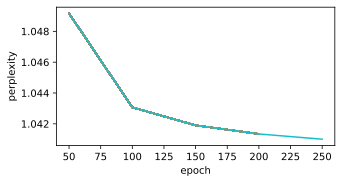

In [6]:
num_steps, num_hiddens, num_epochs, batch_size, lr, clipping_theta  = 35, 256, 250, 32, 1e-3, 1e-2
pred_period, pred_len, prefixes = 50, 50, ['分开', '不分开']
mp.train_and_predict_rnn_pytorch(model, num_hiddens, vocab_size, device, corpus_indices, idx_to_char, char_to_idx, num_epochs,
                                 num_steps, lr, clipping_theta, batch_size, pred_period, pred_len, prefixes)